In [1]:
# Define the object we use
class geminiData:
    GainLoss = 0
    Variance = 0
    Volume   = 0
    Hour     = 0
    Day      = 0

geminiDatas = []

In [2]:
# reference to this https://realpython.com/python-csv/
import csv

with open ('GEMINI_BTC.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count >= 2:
            line_count += 1
            #1: Date
            #2: Symbol
            #3: Open
            #4: High
            #5: Low
            #6: Close
            #7: Volume
            
            # Gain loss
            temp = geminiData()
            temp.GainLoss = float(row[3]) - float(row[6])
            # Variance
            temp.Variance = float(row[4]) - float(row[5])
            # Volume 
            temp.Volume = int (row[7].replace("." , ""))
            # Hour
            temp.Hour = row[1].split(" ")[1].split(":")[0]
            # Day
            temp.Day = row[1].split(" ")[0].split("-")[2]
            
            geminiDatas.append(temp) 
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')
    
    
    
    

Processed 31190 lines.


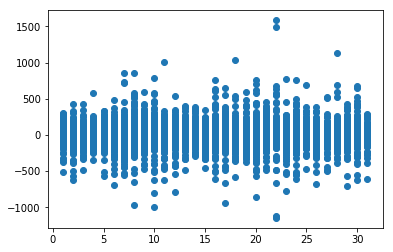

In [11]:
import matplotlib.pyplot as plt

x_vals,y_vals = zip(*[(float(i.Day),float(i.GainLoss)) for i in geminiDatas])

plt.scatter(x_vals,y_vals)
plt.show()